<a href="https://colab.research.google.com/github/Neermalsha/Information-Retrieval-/blob/main/Week_2_EDA_Seattle_Weather.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Set style for visualization
sns.set(style="whitegrid")




# Loading the dataset and displaying its first few rows
file_path = '/content/drive/MyDrive/seattle-weather.csv'  # replace with the actual file path
df = pd.read_csv(file_path)
print("Dataset Loaded Successfully!")
print(df.head())



Dataset Loaded Successfully!
         date  precipitation  temp_max  temp_min  wind  weather
0  2012-01-01            0.0      12.8       5.0   4.7  drizzle
1  2012-01-02           10.9      10.6       2.8   4.5     rain
2  2012-01-03            0.8      11.7       7.2   2.3     rain
3  2012-01-04           20.3      12.2       5.6   4.7     rain
4  2012-01-05            1.3       8.9       2.8   6.1     rain


In [ ]:
# Checking data types and summary information
print("\nData Types and Summary Info:")
print(df.info())


Data Types and Summary Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB
None


In [ ]:
# Checking for null values
print("\nNull Values in Dataset:")
print(df.isnull().sum())


Null Values in Dataset:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


In [ ]:
# 2. Imputation
# Checking for missing values and imputing if any
# For numerical data, we can use mean/median imputation; for categorical, we can use mode imputation
numerical_features = ['precipitation', 'temp_max', 'temp_min', 'wind']
categorical_features = ['weather']

# Imputing missing numerical values with mean
for feature in numerical_features:
    if df[feature].isnull().sum() > 0:
        df[feature].fillna(df[feature].mean(), inplace=True)

# Imputing missing categorical values with mode
for feature in categorical_features:
    if df[feature].isnull().sum() > 0:
        df[feature].fillna(df[feature].mode()[0], inplace=True)

print("\nNull Values after Imputation:")
print(df.isnull().sum())


Null Values after Imputation:
date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64


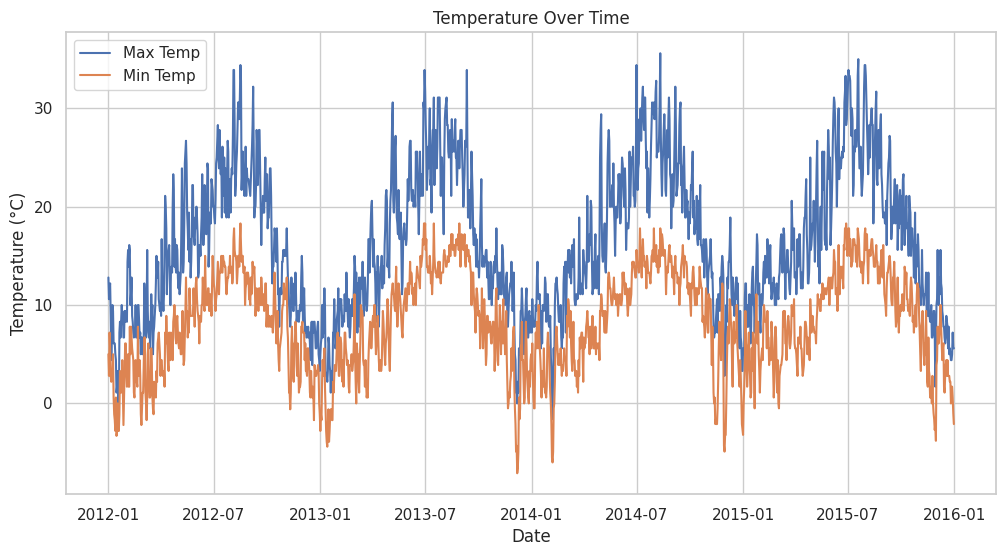

In [ ]:
# 3. Data Visualization
# a. Time series plot of temperature data (temp_max and temp_min over time)
df['date'] = pd.to_datetime(df['date'])
plt.figure(figsize=(12, 6))
plt.plot(df['date'], df['temp_max'], label='Max Temp')
plt.plot(df['date'], df['temp_min'], label='Min Temp')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Over Time')
plt.legend()
plt.show()

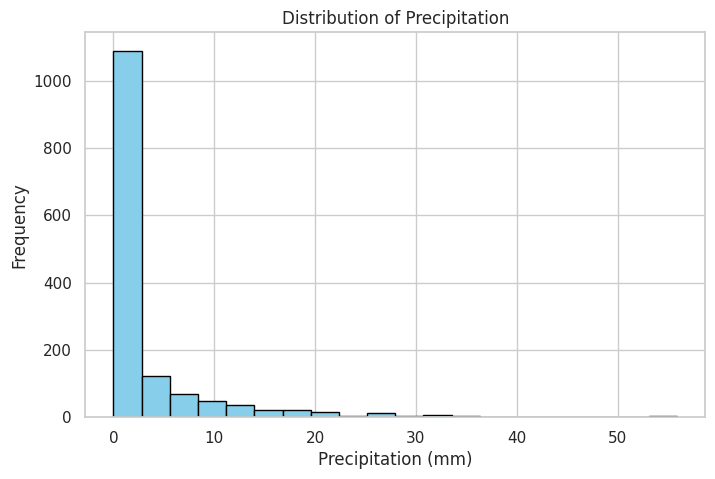

In [ ]:
# b. Histogram of precipitation
plt.figure(figsize=(8, 5))
plt.hist(df['precipitation'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')
plt.title('Distribution of Precipitation')
plt.show()

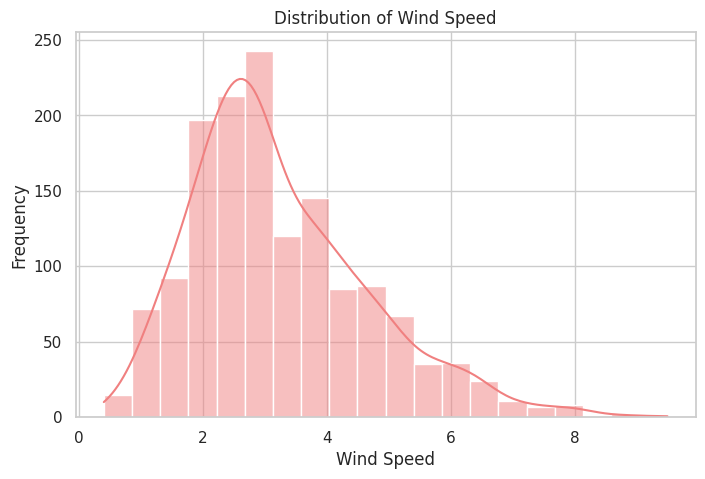

In [ ]:
# c. Wind speed distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['wind'], bins=20, kde=True, color='lightcoral')
plt.xlabel('Wind Speed')
plt.ylabel('Frequency')
plt.title('Distribution of Wind Speed')
plt.show()

<ipython-input-22-f1d37c5e0a03>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='weather', palette='viridis')


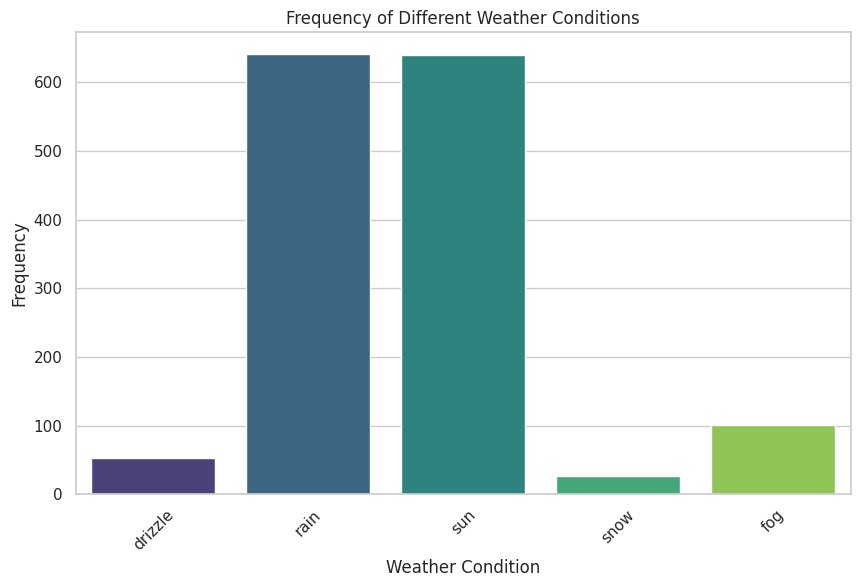

In [ ]:
# d. Count plot of weather conditions
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='weather', palette='viridis')
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Frequency of Different Weather Conditions')
plt.xticks(rotation=45)
plt.show()

In [ ]:
# 4. Feature Engineering (Correlation)
# Calculating correlation matrix for numerical features
correlation_matrix = df[numerical_features].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)


Correlation Matrix:
               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


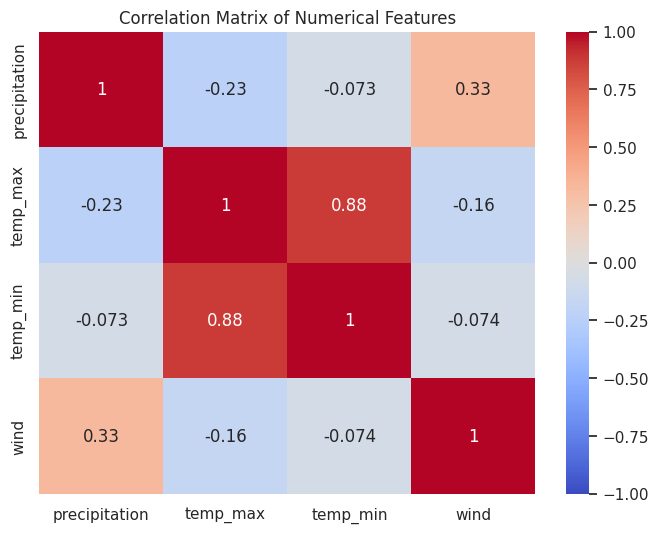

In [ ]:
# Heatmap for visualizing the correlations
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
# 5. Encoding
# Encoding the 'weather' column using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['weather'], drop_first=True)
print("\nData after Encoding:")
print(df_encoded.head())


Data after Encoding:
        date  precipitation  temp_max  temp_min  wind  weather_fog  \
0 2012-01-01            0.0      12.8       5.0   4.7        False   
1 2012-01-02           10.9      10.6       2.8   4.5        False   
2 2012-01-03            0.8      11.7       7.2   2.3        False   
3 2012-01-04           20.3      12.2       5.6   4.7        False   
4 2012-01-05            1.3       8.9       2.8   6.1        False   

   weather_rain  weather_snow  weather_sun  
0         False         False        False  
1          True         False        False  
2          True         False        False  
3          True         False        False  
4          True         False        False  
